In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact

In [2]:
data = pd.read_csv('etfs_dataset_modelling.csv')

In [3]:
data.dropna(inplace=True)

In [4]:
data = data.drop(['Unnamed: 0'], axis=1)
data

Ticker                       Date       Open       High        Low  \
25        FGDL  2022-08-05 00:00:00-04:00  23.820000  23.820000  23.768000   
26        FGDL  2022-08-08 00:00:00-04:00  23.900999  23.952000  23.900999   
27        FGDL  2022-08-09 00:00:00-04:00  24.016001  24.070000  24.016001   
28        FGDL  2022-08-10 00:00:00-04:00  23.972000  23.975000  23.972000   
29        FGDL  2022-08-11 00:00:00-04:00  23.913000  23.913000  23.913000   
...        ...                        ...        ...        ...        ...   
3571480   AUGT  2024-07-02 00:00:00-04:00  29.120001  29.195000  29.120001   
3571481   AUGT  2024-07-03 00:00:00-04:00  29.221001  29.270000  29.180000   
3571482   AUGT  2024-07-05 00:00:00-04:00  29.240000  29.297001  29.240000   
3571483   AUGT  2024-07-08 00:00:00-04:00  29.299999  29.340000  29.299999   
3571484   AUGT  2024-07-09 00:00:00-04:00  29.368000  29.368000  29.299999   

             Close    Volume  Dividends  Stock Splits       RSI_9      RSI_14  \
25       23.768000  210200.0        0.0           0.0   96.519827   57.326070   
26       23.952000     200.0        0.0           0.0  100.000000   62.375775   
27       24.049999   11300.0        0.0           0.0  100.000000   67.369977   
28       23.975000     200.0        0.0           0.0  100.000000   78.593118   
29       23.913000       0.0        0.0           0.0  100.000000   89.394880   
...            ...       ...        ...           ...         ...         ...   
3571480  29.195000     200.0        0.0           0.0  100.000000  100.000000   
3571481  29.267000    2300.0        0.0           0.0  100.000000  100.000000   
3571482  29.297001     500.0        0.0           0.0  100.000000  100.000000   
3571483  29.332001     600.0        0.0           0.0  100.000000  100.000000   
3571484  29.327000    4300.0        0.0           0.0  100.000000  100.000000   

             RSI_25     ewma_7    ewma_50   ewma_200  Close_target  
25         0.000000  23.655462  23.651515  23.995224     23.952000  
26         0.000000  23.729596  23.663299  23.994794     24.049999  
27        38.395312  23.809697  23.678464  23.995344     23.975000  
28        62.521736  23.851023  23.690093  23.995141     23.913000  
29        72.365015  23.866517  23.698834  23.994324     24.110001  
...             ...        ...        ...        ...           ...  
3571480  100.000000  29.097374  28.455972  26.980250     29.267000  
3571481  100.000000  29.139780  28.487777  27.003004     29.297001  
3571482  100.000000  29.179086  28.519512  27.025830     29.332001  
3571483  100.000000  29.217314  28.551374  27.048777     29.327000  
3571484  100.000000  29.244736  28.581791  27.071446     29.358999  

[3480401 rows x 16 columns]

In [5]:
data['Date'] = pd.to_datetime(data['Date'], utc=True)
data['Date'] = data['Date'].dt.date

In [8]:
data

Ticker        Date       Open       High        Low      Close  \
25        FGDL  2022-08-05  23.820000  23.820000  23.768000  23.768000   
26        FGDL  2022-08-08  23.900999  23.952000  23.900999  23.952000   
27        FGDL  2022-08-09  24.016001  24.070000  24.016001  24.049999   
28        FGDL  2022-08-10  23.972000  23.975000  23.972000  23.975000   
29        FGDL  2022-08-11  23.913000  23.913000  23.913000  23.913000   
...        ...         ...        ...        ...        ...        ...   
3571480   AUGT  2024-07-02  29.120001  29.195000  29.120001  29.195000   
3571481   AUGT  2024-07-03  29.221001  29.270000  29.180000  29.267000   
3571482   AUGT  2024-07-05  29.240000  29.297001  29.240000  29.297001   
3571483   AUGT  2024-07-08  29.299999  29.340000  29.299999  29.332001   
3571484   AUGT  2024-07-09  29.368000  29.368000  29.299999  29.327000   

           Volume  Dividends  Stock Splits       RSI_9      RSI_14  \
25       210200.0        0.0           0.0   96.519827   57.326070   
26          200.0        0.0           0.0  100.000000   62.375775   
27        11300.0        0.0           0.0  100.000000   67.369977   
28          200.0        0.0           0.0  100.000000   78.593118   
29            0.0        0.0           0.0  100.000000   89.394880   
...           ...        ...           ...         ...         ...   
3571480     200.0        0.0           0.0  100.000000  100.000000   
3571481    2300.0        0.0           0.0  100.000000  100.000000   
3571482     500.0        0.0           0.0  100.000000  100.000000   
3571483     600.0        0.0           0.0  100.000000  100.000000   
3571484    4300.0        0.0           0.0  100.000000  100.000000   

             RSI_25     ewma_7    ewma_50   ewma_200  Close_target  
25         0.000000  23.655462  23.651515  23.995224     23.952000  
26         0.000000  23.729596  23.663299  23.994794     24.049999  
27        38.395312  23.809697  23.678464  23.995344     23.975000  
28        62.521736  23.851023  23.690093  23.995141     23.913000  
29        72.365015  23.866517  23.698834  23.994324     24.110001  
...             ...        ...        ...        ...           ...  
3571480  100.000000  29.097374  28.455972  26.980250     29.267000  
3571481  100.000000  29.139780  28.487777  27.003004     29.297001  
3571482  100.000000  29.179086  28.519512  27.025830     29.332001  
3571483  100.000000  29.217314  28.551374  27.048777     29.327000  
3571484  100.000000  29.244736  28.581791  27.071446     29.358999  

[3480401 rows x 16 columns]

In [7]:
data.to_csv('etfs_dataset_modelling.csv')

In [9]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Crear lags en el precio si es relevante

def create_lags(df, lags):

    for i in range(1,lags+1):
        df[f'lag_{i}'] = df['Close'].shift(i)
    return df

data_lags = create_lags(data, 7)


In [10]:
data_lags.dropna(inplace=True)
data_lags

Ticker        Date       Open       High        Low      Close  \
39        FGDL  2022-08-25  23.530001  23.530001  23.530001  23.530001   
40        FGDL  2022-08-26  23.469999  23.500000  23.237000  23.267000   
41        FGDL  2022-08-29  23.266001  23.266001  23.266001  23.266001   
42        FGDL  2022-08-30  23.080000  23.080000  23.080000  23.080000   
43        FGDL  2022-08-31  22.931000  22.995001  22.910000  22.910000   
...        ...         ...        ...        ...        ...        ...   
3571480   AUGT  2024-07-02  29.120001  29.195000  29.120001  29.195000   
3571481   AUGT  2024-07-03  29.221001  29.270000  29.180000  29.267000   
3571482   AUGT  2024-07-05  29.240000  29.297001  29.240000  29.297001   
3571483   AUGT  2024-07-08  29.299999  29.340000  29.299999  29.332001   
3571484   AUGT  2024-07-09  29.368000  29.368000  29.299999  29.327000   

         Volume  Dividends  Stock Splits       RSI_9  ...    ewma_50  \
39        100.0        0.0           0.0    9.770280  ...  23.657112   
40       5600.0        0.0           0.0    3.367655  ...  23.641813   
41        400.0        0.0           0.0    0.000000  ...  23.627075   
42        100.0        0.0           0.0    0.000000  ...  23.605621   
43       1400.0        0.0           0.0    0.000000  ...  23.578342   
...         ...        ...           ...         ...  ...        ...   
3571480   200.0        0.0           0.0  100.000000  ...  28.455972   
3571481  2300.0        0.0           0.0  100.000000  ...  28.487777   
3571482   500.0        0.0           0.0  100.000000  ...  28.519512   
3571483   600.0        0.0           0.0  100.000000  ...  28.551374   
3571484  4300.0        0.0           0.0  100.000000  ...  28.581791   

          ewma_200  Close_target      lag_1      lag_2      lag_3      lag_4  \
39       23.955668     23.267000  23.465000  23.393000  23.240000  23.389999   
40       23.948815     23.266001  23.530001  23.465000  23.393000  23.240000   
41       23.942021     23.080000  23.267000  23.530001  23.465000  23.393000   
42       23.933444     22.910000  23.266001  23.267000  23.530001  23.465000   
43       23.923260     22.702999  23.080000  23.266001  23.267000  23.530001   
...            ...           ...        ...        ...        ...        ...   
3571480  26.980250     29.267000  29.135000  29.063000  29.100000  29.080000   
3571481  27.003004     29.297001  29.195000  29.135000  29.063000  29.100000   
3571482  27.025830     29.332001  29.267000  29.195000  29.135000  29.063000   
3571483  27.048777     29.327000  29.297001  29.267000  29.195000  29.135000   
3571484  27.071446     29.358999  29.332001  29.297001  29.267000  29.195000   

             lag_5      lag_6      lag_7  
39       23.559999  23.636000  23.787001  
40       23.389999  23.559999  23.636000  
41       23.240000  23.389999  23.559999  
42       23.393000  23.240000  23.389999  
43       23.465000  23.393000  23.240000  
...            ...        ...        ...  
3571480  29.052000  29.011000  29.021999  
3571481  29.080000  29.052000  29.011000  
3571482  29.100000  29.080000  29.052000  
3571483  29.063000  29.100000  29.080000  
3571484  29.135000  29.063000  29.100000  

[3480387 rows x 23 columns]

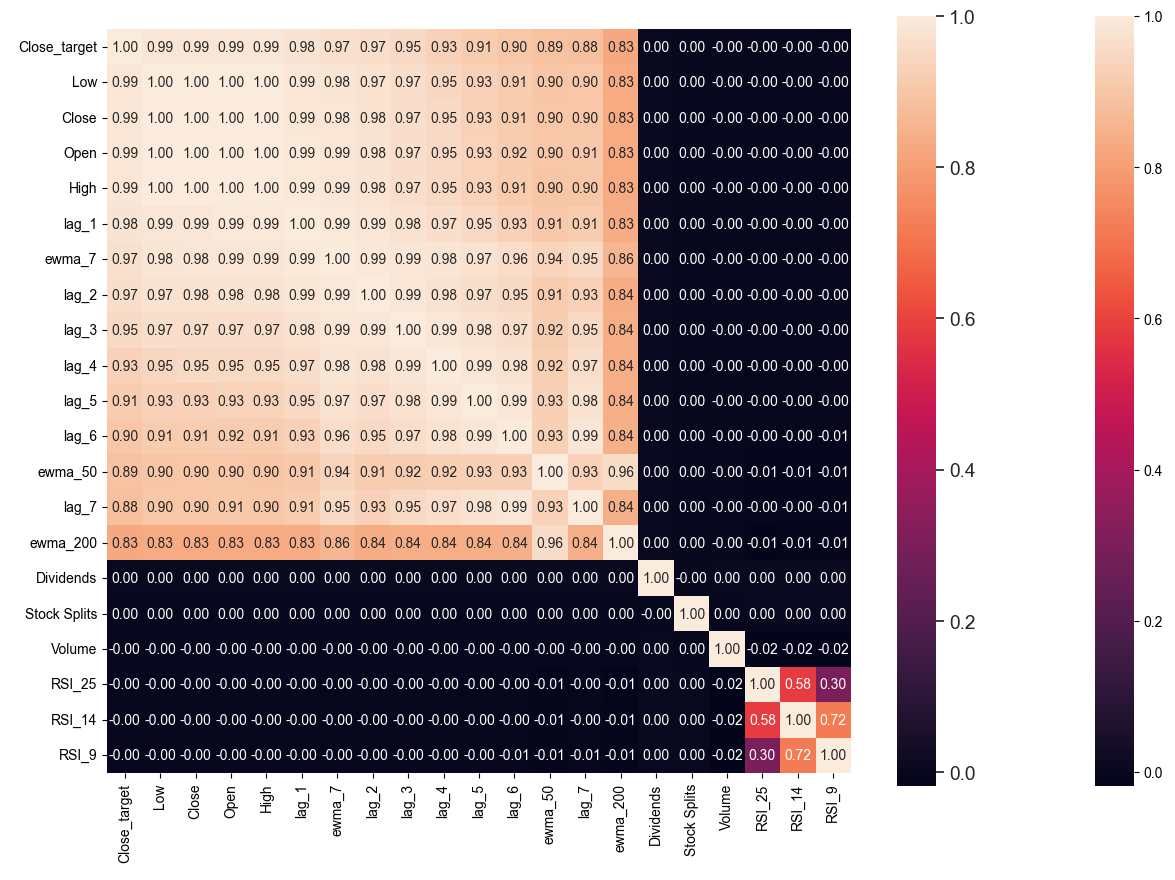

In [14]:
plt.figure(figsize=(15,10))
corrmat = data_lags.drop(['Ticker','Date'], axis=1).corr()
sns.heatmap(corrmat, square=True)

k = len(data.columns)

cols = corrmat.nlargest(k, 'Close_target')['Close_target'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
yticklabels=cols.values, xticklabels=cols.values)

plt.show()

In [15]:
X = [data for data in data.groupby('Ticker')]
y = [data for data in data.groupby('Ticker')['Close_target']]

X

[('AAA',
          Ticker        Date       Open       High        Low      Close  \
  1173759    AAA  2020-10-14  24.713815  24.713815  24.703897  24.703897   
  1173760    AAA  2020-10-15  24.703897  24.713815  24.693980  24.703897   
  1173761    AAA  2020-10-16  24.699931  24.703897  24.693980  24.703897   
  1173762    AAA  2020-10-19  24.693981  24.703898  24.693981  24.698940   
  1173763    AAA  2020-10-20  24.703897  24.713815  24.693980  24.703897   
  ...        ...         ...        ...        ...        ...        ...   
  1174692    AAA  2024-07-02  25.070000  25.070000  25.000000  25.049999   
  1174693    AAA  2024-07-03  25.070000  25.090000  25.010000  25.049999   
  1174694    AAA  2024-07-05  25.010000  25.100000  25.010000  25.056000   
  1174695    AAA  2024-07-08  25.080000  25.080000  25.059999  25.059999   
  1174696    AAA  2024-07-09  25.030001  25.040001  25.010000  25.030001   
  
            Volume  Dividends  Stock Splits      RSI_9  ...    ewma_50  \
  

##### Dataset X e y

prueba_X => Serie de un ETF con todas las variables X

prueba_y => Serie de un ETF con la variable y (Close_target)

In [16]:
import random
from random import randint
from functions import data_train_test_regression
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.offline as pyo

In [ ]:
count = 0
best_pred_etf = dict()
worst_pred_etf = dict()
mse_etfs = dict()
r2_etfs = dict()

In [53]:
X[1979]
X[2574]
X[2937]
X[3067]

('URA',
        Ticker        Date       Open       High        Low      Close  \
 298459    URA  2018-02-07  11.266011  11.384600  11.181304  11.274482   
 298460    URA  2018-02-08  11.308366  11.384602  10.969538  10.994950   
 298461    URA  2018-02-09  11.062714  11.198245  10.588355  10.791652   
 298462    URA  2018-02-12  10.918712  11.011890  10.850947  10.944124   
 298463    URA  2018-02-13  10.969537  11.325306  10.944126  11.316835   
 ...       ...         ...        ...        ...        ...        ...   
 300068    URA  2024-07-02  29.200001  29.240000  28.580000  28.900000   
 300069    URA  2024-07-03  29.469999  30.000000  29.450001  29.830000   
 300070    URA  2024-07-05  29.930000  29.980000  29.209999  29.690001   
 300071    URA  2024-07-08  29.650000  29.790001  29.280001  29.430000   
 300072    URA  2024-07-09  29.340000  29.900000  29.309999  29.719999   
 
            Volume  Dividends  Stock Splits      RSI_9  ...    ewma_50  \
 298459   165900.0        0.

In [56]:

for i in range(3068, len(X)):
    
    X = [data for data in data.groupby('Ticker')]
    y = [data for data in data.groupby('Ticker')['Close_target']]


    prueba_X = X[i][1].drop(['Ticker','Close_target', 'Date', 'Volume', 'Dividends', 'Stock Splits', 'RSI_9', 'RSI_14', 'RSI_25'], axis=1)
    prueba_y = y[i][1]

    X_train, y_train, X_val, y_val, X_test, y_test = data_train_test_regression(prueba_X, prueba_y)

    extr_model = ExtraTreesRegressor(max_depth= 10, 
                                     max_samples= None, 
                                     min_samples_split= 5, 
                                     n_estimators= 200, 
                                     random_state=42)

    extr_model.fit(X_train, y_train)
    y_pred_val = extr_model.predict(X_val)

    mse_extr = mean_squared_error(y_val, y_pred_val)
    r2_extr = r2_score(y_val, y_pred_val)
    print(f'Ticker {X[i][0]} {i} validation:\n')
    print(f'MSE val ExtraTree: {mse_extr}')
    print(f'R2 ExtraTree: {r2_extr}\n')


    X_combined = pd.concat([X_train, X_val])
    y_combined = pd.concat([y_train, y_val])


    extr_model.fit(X_combined, y_combined)
    y_pred = extr_model.predict(X_test)

    mse_extr_test = mean_squared_error(y_test, y_pred)
    r2_extr_test = r2_score(y_test, y_pred)
    print(f'Ticker {X[i][0]} {i} test:\n')
    print(f'MSE ExtraTree: {mse_extr_test}')
    print(f'R2 ExtraTree: {r2_extr_test}\n')
    print('***********''\n')
    
    if mse_extr_test <= 1 and r2_extr_test > 0.6:
        count +=1
        best_pred_etf[X[i][0]] = i
        mse_etfs[X[i][0]] = mse_extr_test
        r2_etfs[X[i][0]] = r2_extr_test
    

Ticker URE 3068 validation:

MSE val ExtraTree: 9.689838170949358
R2 ExtraTree: 0.9672023393887808

Ticker URE 3068 test:

MSE ExtraTree: 1.547290870290416
R2 ExtraTree: 0.9280842734043476

***********

Ticker URNJ 3069 validation:

MSE val ExtraTree: 5.1251555369627155
R2 ExtraTree: -0.6114144786372593

Ticker URNJ 3069 test:

MSE ExtraTree: 0.7493110523649938
R2 ExtraTree: 0.7606184213702964

***********

Ticker URNM 3070 validation:

MSE val ExtraTree: 0.7559222062412408
R2 ExtraTree: 0.8123895884255811

Ticker URNM 3070 test:

MSE ExtraTree: 16.8062250194131
R2 ExtraTree: 0.30253172055543576

***********

Ticker URTH 3071 validation:

MSE val ExtraTree: 5.879160107288295
R2 ExtraTree: 0.907948612753455

Ticker URTH 3071 test:

MSE ExtraTree: 72.94121238944892
R2 ExtraTree: 0.3907819117423048

***********

Ticker URTY 3072 validation:

MSE val ExtraTree: 11.07057073698723
R2 ExtraTree: 0.9622935606241643

Ticker URTY 3072 test:

MSE ExtraTree: 2.5576970163948918
R2 ExtraTree: 0.9172

C:\Users\irene\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



Ticker XMAY 3340 validation:

MSE val ExtraTree: 0.006781308844380839
R2 ExtraTree: nan

Ticker XMAY 3340 test:

MSE ExtraTree: 0.00807913509059917
R2 ExtraTree: -4.2942753346482165

***********

Ticker XME 3341 validation:

MSE val ExtraTree: 52.25204167015692
R2 ExtraTree: -0.6677881974901236

Ticker XME 3341 test:

MSE ExtraTree: 1.0458202190309558
R2 ExtraTree: 0.9543853846700339

***********

Ticker XMHQ 3342 validation:

MSE val ExtraTree: 4.197246323722168
R2 ExtraTree: 0.788329706216186

Ticker XMHQ 3342 test:

MSE ExtraTree: 167.39992896047897
R2 ExtraTree: -0.17072102273756729

***********

Ticker XMLV 3343 validation:

MSE val ExtraTree: 0.5441958692381099
R2 ExtraTree: 0.8618922851564327

Ticker XMLV 3343 test:

MSE ExtraTree: 0.3771975434704449
R2 ExtraTree: 0.9386198854599417

***********

Ticker XMMO 3344 validation:

MSE val ExtraTree: 4.633832837913238
R2 ExtraTree: 0.8292830197956585

Ticker XMMO 3344 test:

MSE ExtraTree: 103.23374716633818
R2 ExtraTree: 0.5511476853

In [62]:
best_pred_etf.values()

dict_values([2, 3, 4, 8, 9, 14, 15, 18, 19, 20, 21, 22, 26, 29, 32, 33, 34, 37, 40, 41, 45, 46, 50, 53, 58, 59, 63, 64, 78, 80, 84, 85, 86, 88, 89, 90, 92, 95, 98, 100, 105, 113, 114, 116, 118, 124, 125, 126, 127, 130, 140, 142, 143, 147, 153, 157, 161, 166, 168, 169, 170, 183, 185, 186, 190, 191, 192, 194, 196, 197, 198, 200, 201, 203, 204, 205, 206, 208, 214, 215, 219, 226, 229, 232, 235, 236, 237, 240, 242, 252, 253, 255, 258, 261, 262, 264, 265, 269, 273, 275, 276, 277, 278, 279, 280, 284, 286, 287, 288, 289, 290, 291, 292, 295, 297, 299, 301, 302, 306, 309, 312, 313, 314, 315, 316, 317, 318, 319, 320, 323, 324, 325, 326, 327, 332, 333, 334, 335, 336, 337, 338, 339, 340, 344, 345, 346, 349, 350, 355, 367, 368, 374, 375, 378, 379, 380, 381, 385, 395, 397, 399, 400, 401, 404, 406, 407, 409, 410, 411, 413, 414, 416, 418, 419, 421, 422, 428, 432, 435, 438, 439, 440, 443, 444, 445, 446, 447, 449, 450, 454, 458, 459, 460, 461, 462, 465, 466, 468, 470, 474, 476, 479, 485, 486, 487, 490, 4

In [66]:
print(best_pred_etf)
print(len(best_pred_etf))
best_pred_etf = pd.DataFrame(best_pred_etf, index=[0])

{'AADR': 2, 'AAPB': 3, 'AAPD': 4, 'AAPY': 8, 'AAXJ': 9, 'ACSI': 14, 'ACTV': 15, 'ACWV': 18, 'ACWX': 19, 'ADFI': 20, 'ADIV': 21, 'ADME': 22, 'AESR': 26, 'AFK': 29, 'AFSM': 32, 'AFTY': 33, 'AGG': 34, 'AGGY': 37, 'AGNG': 40, 'AGOX': 41, 'AGZ': 45, 'AGZD': 46, 'AIA': 50, 'AIEQ': 53, 'AIVI': 58, 'AIVL': 59, 'ALTL': 63, 'ALTY': 64, 'AMZA': 78, 'AMZP': 80, 'ANEW': 84, 'ANGL': 85, 'AOA': 86, 'AOK': 88, 'AOM': 89, 'AOR': 90, 'APCB': 92, 'APMU': 95, 'APRJ': 98, 'APRQ': 100, 'AQWA': 105, 'ARKF': 113, 'ARKG': 114, 'ARKQ': 116, 'ARKX': 118, 'ASEA': 124, 'ASET': 125, 'ASHR': 126, 'ASHS': 127, 'ATFV': 130, 'AVDV': 140, 'AVEM': 142, 'AVES': 143, 'AVIG': 147, 'AVMU': 153, 'AVRE': 157, 'AVSF': 161, 'AWAY': 166, 'AZTD': 168, 'BAB': 169, 'BABX': 170, 'BATT': 183, 'BBAG': 185, 'BBAX': 186, 'BBC': 190, 'BBCA': 191, 'BBCB': 192, 'BBEU': 194, 'BBHY': 196, 'BBIB': 197, 'BBIN': 198, 'BBJP': 200, 'BBLB': 201, 'BBMC': 203, 'BBP': 204, 'BBRE': 205, 'BBSA': 206, 'BBSC': 208, 'BDCX': 214, 'BDCZ': 215, 'BECO': 219, '

In [71]:
best_pred_etf = best_pred_etf.T[0].rename({'0':'ID'})

In [80]:
best_pred_etf['Ticker'] = best_pred_etf.index

In [78]:
best_pred_etf.to_csv('best_pred_etf.csv')

In [79]:
pd.read_csv('best_pred_etf.csv')

Unnamed: 0                                                  0
0          AADR                                                  2
1          AAPB                                                  3
2          AAPD                                                  4
3          AAPY                                                  8
4          AAXJ                                                  9
...         ...                                                ...
1481       YOLO                                               3405
1482        YXI                                               3407
1483        YYY                                               3408
1484       ZHDG                                               3411
1485     Ticker  Index(['AADR', 'AAPB', 'AAPD', 'AAPY', 'AAXJ',...

[1486 rows x 2 columns]

In [82]:
print(mse_etfs)
print(len(mse_etfs))

{'AADR': 0.3903712730650859, 'AAPB': 0.6330773154582467, 'AAPD': 0.8033493910817622, 'AAPY': 0.09016848286504402, 'AAXJ': 0.434405775795828, 'ACSI': 0.5652931082867186, 'ACTV': 0.16176049742321708, 'ACWV': 0.32630101888559093, 'ACWX': 0.21469613549683106, 'ADFI': 0.005996956161470263, 'ADIV': 0.01975479621628879, 'ADME': 0.1474249483537975, 'AESR': 0.48617418610840074, 'AFK': 0.09570669237740466, 'AFSM': 0.20792051727525046, 'AFTY': 0.05118667312930277, 'AGG': 0.18071957222319443, 'AGGY': 0.03126375450211454, 'AGNG': 0.054733766304092143, 'AGOX': 0.45512267533749123, 'AGZ': 0.06098487183546708, 'AGZD': 0.00334523494915343, 'AIA': 0.61295596322709, 'AIEQ': 0.15447606685747833, 'AIVI': 0.11143977241810317, 'AIVL': 0.5401116491531003, 'ALTL': 0.22559005876593133, 'ALTY': 0.00528933557645555, 'AMZA': 0.21618541911083822, 'AMZP': 0.10186079350149443, 'ANEW': 0.13496239458768913, 'ANGL': 0.01656565919990476, 'AOA': 0.6051235458765047, 'AOK': 0.02543322453872161, 'AOM': 0.04131626650181197, '

In [83]:
mse_etfs = pd.DataFrame(mse_etfs, index=[0])
mse_etfs

AADR      AAPB      AAPD      AAPY      AAXJ      ACSI     ACTV  \
0  0.390371  0.633077  0.803349  0.090168  0.434406  0.565293  0.16176   

       ACWV      ACWX      ADFI  ...      XTWY      XVOL      XYLD      XYLE  \
0  0.326301  0.214696  0.005997  ...  0.288089  0.026369  0.044974  0.016119   

       XYLG     YANG      YOLO       YXI       YYY      ZHDG  
0  0.025672  0.44843  0.031248  0.102263  0.003808  0.043484  

[1 rows x 1485 columns]

In [84]:
mse_etfs = mse_etfs.T[0].rename({'0':'ID'})

In [85]:
mse_etfs

AADR    0.390371
AAPB    0.633077
AAPD    0.803349
AAPY    0.090168
AAXJ    0.434406
          ...   
YANG    0.448430
YOLO    0.031248
YXI     0.102263
YYY     0.003808
ZHDG    0.043484
Name: 0, Length: 1485, dtype: float64

In [86]:
mse_etfs['Ticker'] = mse_etfs.index


In [87]:
mse_etfs.to_csv('mse_etfs.csv')


In [88]:
pd.read_csv('mse_etfs.csv')

Unnamed: 0                                                  0
0          AADR                                 0.3903712730650859
1          AAPB                                 0.6330773154582467
2          AAPD                                 0.8033493910817622
3          AAPY                                0.09016848286504402
4          AAXJ                                  0.434405775795828
...         ...                                                ...
1481       YOLO                               0.031248110327602045
1482        YXI                                0.10226299331291777
1483        YYY                              0.0038084429713858294
1484       ZHDG                                 0.0434843801466688
1485     Ticker  Index(['AADR', 'AAPB', 'AAPD', 'AAPY', 'AAXJ',...

[1486 rows x 2 columns]

In [89]:
print(r2_etfs)
print(len(r2_etfs))
r2_etfs = pd.DataFrame(r2_etfs, index=[0])

r2_etfs = r2_etfs.T[0].rename({'0':'ID'})

r2_etfs['Ticker'] = r2_etfs.index

r2_etfs.to_csv('r2_etfs.csv')

pd.read_csv('r2_etfs.csv')

{'AADR': 0.9881370141278766, 'AAPB': 0.9557703900333152, 'AAPD': 0.7805097425904268, 'AAPY': 0.8296572081049224, 'AAXJ': 0.9424717599111185, 'ACSI': 0.952066229757816, 'ACTV': 0.9492980189515439, 'ACWV': 0.9689912943105121, 'ACWX': 0.970238184025406, 'ADFI': 0.8099575246596128, 'ADIV': 0.9139599545759788, 'ADME': 0.9829725726731582, 'AESR': 0.7599874063690354, 'AFK': 0.887672222348912, 'AFSM': 0.9478777480448628, 'AFTY': 0.9187708413372244, 'AGG': 0.9525289061962681, 'AGGY': 0.9674933578642073, 'AGNG': 0.9738743319262254, 'AGOX': 0.7468552168330486, 'AGZ': 0.9775341037314482, 'AGZD': 0.8853460079858023, 'AIA': 0.9549072047512941, 'AIEQ': 0.9811463189692363, 'AIVI': 0.926626724595036, 'AIVL': 0.9725192253807797, 'ALTL': 0.7127410245183996, 'ALTY': 0.9218725140038646, 'AMZA': 0.9763983833234117, 'AMZP': 0.6799513211300501, 'ANEW': 0.9817534226643106, 'ANGL': 0.9665430484596329, 'AOA': 0.9611980087504951, 'AOK': 0.9723759343039016, 'AOM': 0.9773204457499785, 'AOR': 0.9827205092085558, 'AP

Unnamed: 0                                                  0
0          AADR                                 0.9881370141278766
1          AAPB                                 0.9557703900333152
2          AAPD                                 0.7805097425904268
3          AAPY                                 0.8296572081049224
4          AAXJ                                 0.9424717599111185
...         ...                                                ...
1481       YOLO                                 0.8736424688900861
1482        YXI                                 0.9353480934809436
1483        YYY                                 0.9921760843003571
1484       ZHDG                                 0.8896949059949703
1485     Ticker  Index(['AADR', 'AAPB', 'AAPD', 'AAPY', 'AAXJ',...

[1486 rows x 2 columns]

In [17]:
def plots_predictions(data, 
                      n, 
                      y_train,
                      y_val, 
                      y_test,
                      metric1,
                      metric2):

    fig = make_subplots(rows=15, cols=2, subplot_titles=[f"Plot {i+1}" for i in range(n)])

    # Agregar datos a cada subplot
    for i in range(n):
        row = i // 5 + 1
        col = i % 5 + 1

        # Datos de entrenamiento
        fig.add_trace(
            go.Scatter(
                x=data['Date'], y=y_train,
                mode='markers',
                name=f'Train {i+1}',
                marker=dict(color='blue')
            ),
            row=row, col=col
        )

        # Datos de prueba
        fig.add_trace(
            go.Scatter(
                x=data['Date'], y=y_test,
                mode='markers',
                name=f'Test {i+1},\n MSE: {metric1}, \n R2: {metric2}',
                marker=dict(color='red')
            ),
            row=row, col=col
        )

        # Datos de validación
        fig.add_trace(
            go.Scatter(
                x=data['Date'], y=y_val,
                mode='markers',
                name=f'Validation {i+1}',
                marker=dict(color='green')
            ),
            row=row, col=col
        )

        # Predicciones del test
        fig.add_trace(
            go.Scatter(
                x=data['Date'], y=y_pred,
                mode='lines+markers',
                name=f'Test Predictions {i+1}',
                marker=dict(color='orange'),
                line=dict(dash='dash')
            ),
            row=row, col=col
        )

    # Actualizar layout
    fig.update_layout(
        height=2000, width=1500, 
        title_text=f'Train, Test, Validation and Test Predictions for {n} Datasets',
        showlegend=False
    )

    # Mostrar figura
    return fig.show()

In [ ]:
plots_predictions(data_lags, count, y_train, y_val, y_test, mse_extr_test, r2_extr_test)